In [ ]:
#STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
#STEP 2: LOAD DATASET
df = pd.read_csv('Student Mental health.csv')
df.head()


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
#STEP 3: DATASET STRUCTURE
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
#STEP 4: DATA CLEANING
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.isnull().sum()


,0
timestamp,0
choose_your_gender,0
age,1
what_is_your_course?,0
your_current_year_of_study,0
what_is_your_cgpa?,0
marital_status,0
do_you_have_depression?,0
do_you_have_anxiety?,0
do_you_have_panic_attack?,0


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [ ]:
#STEP 5: DESCRIPTIVE STATISTICS
#(Mean, Median, Mode)
mean = df.mean(numeric_only=True)
median = df.median(numeric_only=True)
mode = df.mode().iloc[0]

print("MEAN:\n", mean)
print("\nMEDIAN:\n", median)
print("\nMODE:\n", mode)


MEAN:
 age    20.53
dtype: float64

MEDIAN:
 age    19.0
dtype: float64

MODE:
 timestamp                                       8/7/2020 12:39
choose_your_gender                                      Female
age                                                       18.0
what_is_your_course?                                       BCS
your_current_year_of_study                              year 1
what_is_your_cgpa?                                 3.50 - 4.00
marital_status                                              No
do_you_have_depression?                                     No
do_you_have_anxiety?                                        No
do_you_have_panic_attack?                                   No
did_you_seek_any_specialist_for_a_treatment?                No
Name: 0, dtype: object


In [ ]:
#Variance & Standard Deviation
variance = df.var(numeric_only=True)
std_dev = df.std(numeric_only=True)

print("VARIANCE:\n", variance)
print("\nSTANDARD DEVIATION:\n", std_dev)


VARIANCE:
 age    6.1691
dtype: float64

STANDARD DEVIATION:
 age    2.483767
dtype: float64


In [ ]:
#Skewness & Kurtosis
skewness = df.skew(numeric_only=True)
kurtosis = df.kurtosis(numeric_only=True)

print("SKEWNESS:\n", skewness)
print("\nKURTOSIS:\n", kurtosis)


SKEWNESS:
 age    0.378999
dtype: float64

KURTOSIS:
 age   -1.626067
dtype: float64


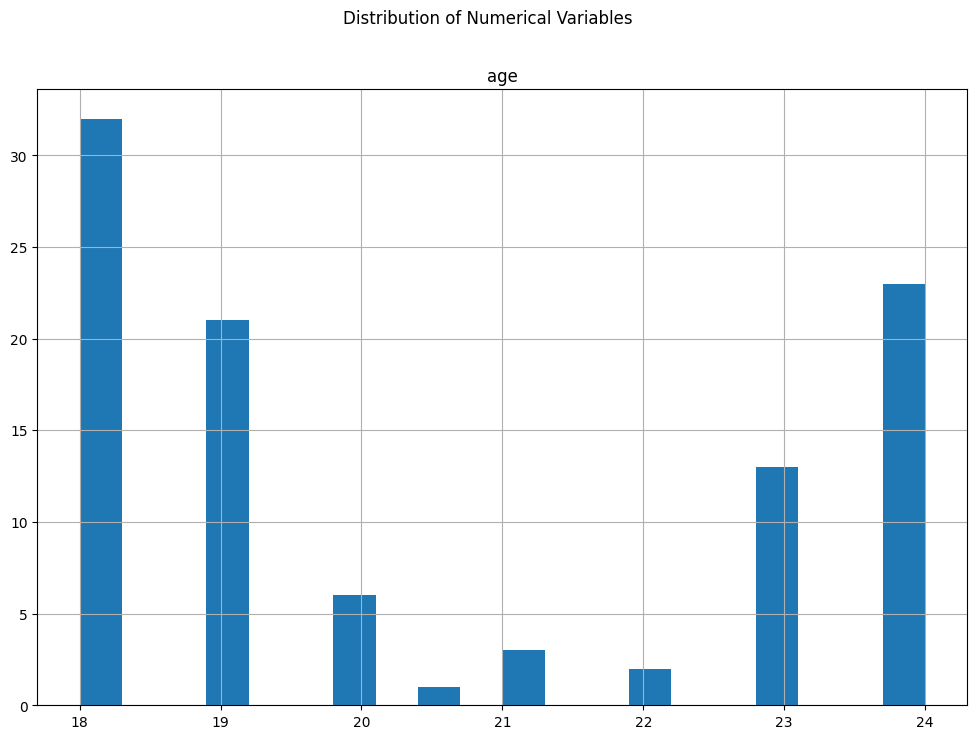

In [ ]:
#STEP 6: UNIVARIATE ANALYSIS
#(Histogram)
df.hist(bins=20, figsize=(12,8))
plt.suptitle("Distribution of Numerical Variables")
plt.show()


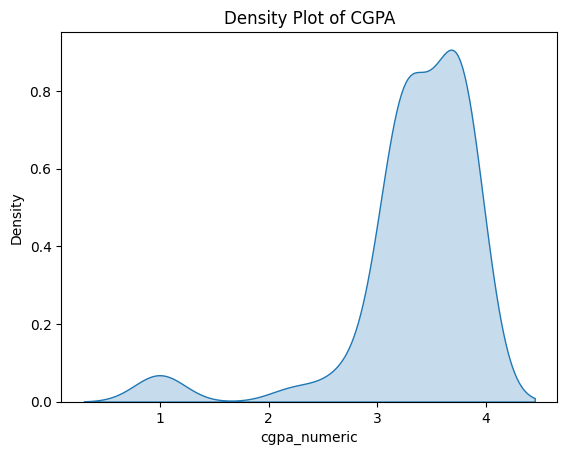

In [ ]:
#(KDE Plot)
def convert_cgpa_to_numeric(cgpa_range):
    if ' - ' in cgpa_range:
        lower, upper = map(float, cgpa_range.split(' - '))
        return (lower + upper) / 2
    try:
        return float(cgpa_range)
    except ValueError:
        return np.nan # Handle cases where conversion fails

df['cgpa_numeric'] = df['what_is_your_cgpa?'].apply(convert_cgpa_to_numeric)

sns.kdeplot(df['cgpa_numeric'], fill=True)
plt.title("Density Plot of CGPA")
plt.show()

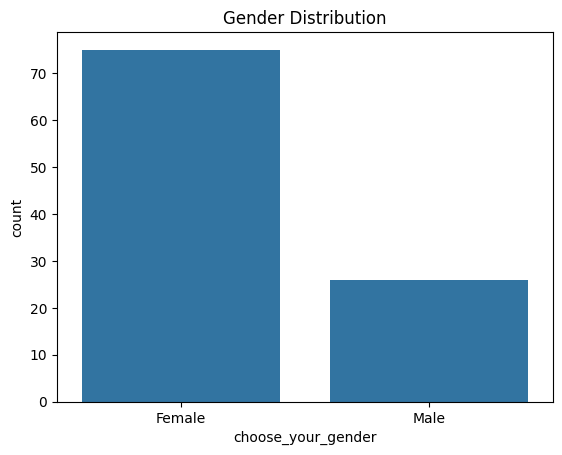

In [ ]:
#(Count Plot)
sns.countplot(x='choose_your_gender', data=df)
plt.title("Gender Distribution")
plt.show()

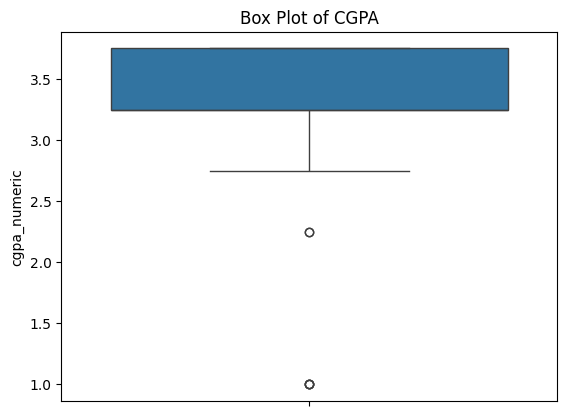

In [ ]:
#(Box Plot)
sns.boxplot(y=df['cgpa_numeric'])
plt.title("Box Plot of CGPA")
plt.show()

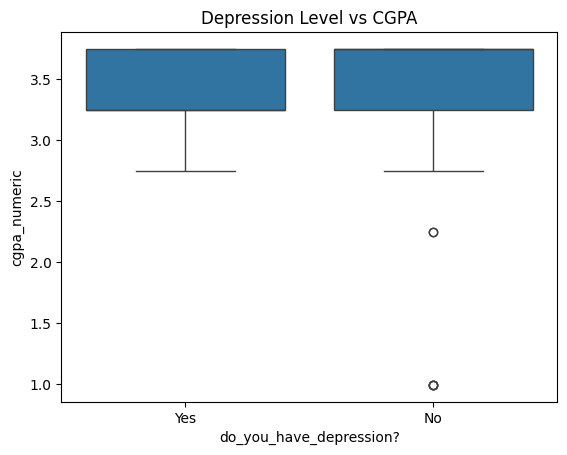

In [ ]:
#(Box Plot)
sns.boxplot(x='do_you_have_depression?', y='cgpa_numeric', data=df)
plt.title("Depression Level vs CGPA")
plt.show()

In [ ]:
#STEP 7: CORRELATION ANALYSIS
#(Correlation Matrix)
corr = df.corr(numeric_only=True)
corr


,age,cgpa_numeric
age,1.000000,0.005128
cgpa_numeric,0.005128,1.000000


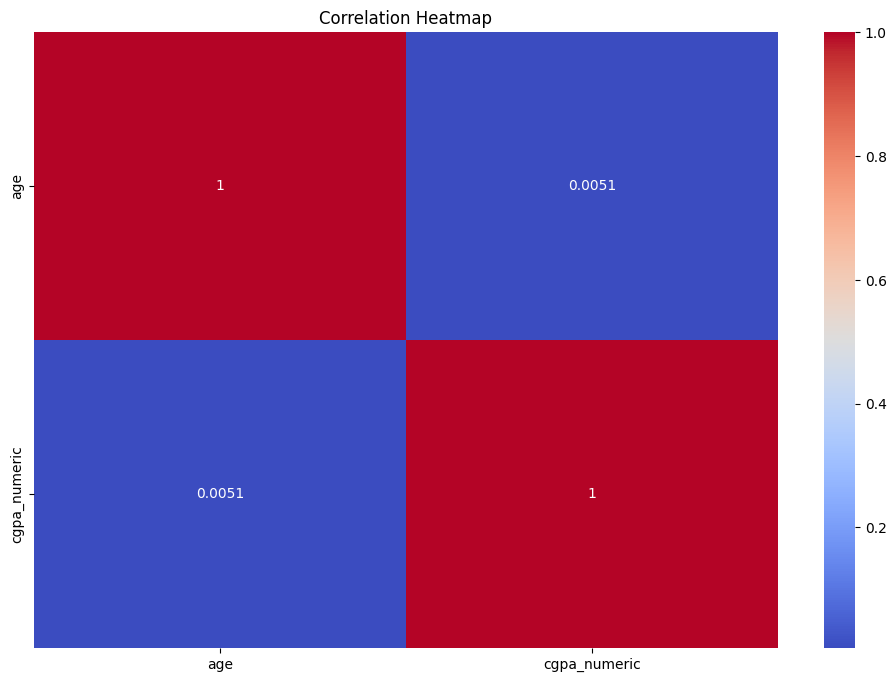

In [ ]:
#(Heatmap)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


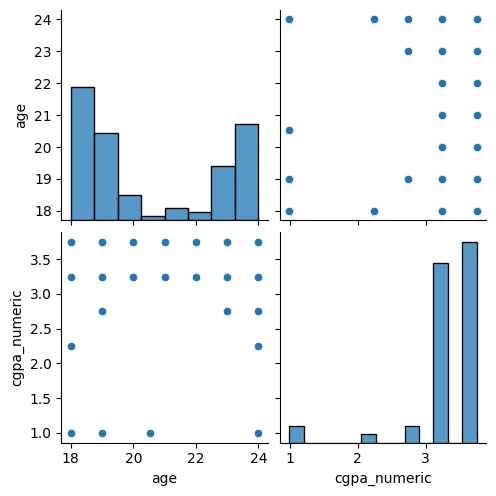

In [ ]:
#(Pairplot)
sns.pairplot(df[['age', 'cgpa_numeric', 'do_you_have_depression?', 'do_you_have_anxiety?']])
plt.show()

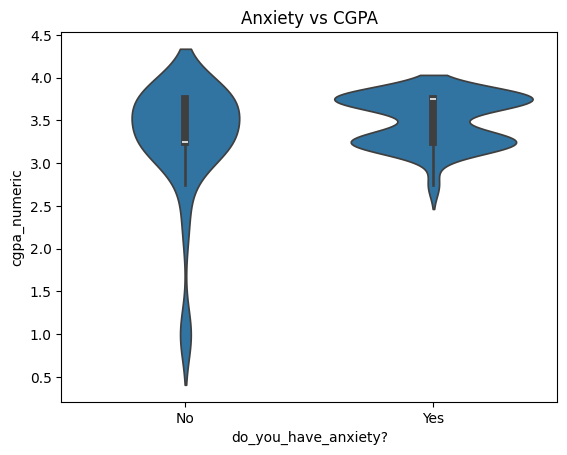

In [ ]:
#(Violin Plot)
sns.violinplot(x='do_you_have_anxiety?', y='cgpa_numeric', data=df)
plt.title("Anxiety vs CGPA")
plt.show()

In [ ]:
#STEP 10: OUTLIER DETECTION (IQR)
Q1 = df['cgpa_numeric'].quantile(0.25)
Q3 = df['cgpa_numeric'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['cgpa_numeric'] < Q1 - 1.5*IQR) | (df['cgpa_numeric'] > Q3 + 1.5*IQR)]
outliers.shape

(6, 12)

In [ ]:
OUTCOME OF THE PROJECT
1. Understanding Student Academic Performance
2. Impact of Mental Health on Academics
3. Lifestyle Factors Affect Performance
4. Identification of At-Risk Students
5. Data-Driven Decision Making
6. Mastery of EDA Techniques
7. Real-World Readiness